pip install google-play-scraper AND 
pip install app_store_scraper

# Data extraction

## Step 1: webscraping

Retrieving data from the 3 main feedback platforms of the 'too good to go' app:

    Google Play
    Apple Store
    Trustpilot

Then storing of the reviews of each platform into an unique file. 

Installation of pip install google-play-scraper to scrap app reviews

In [2]:
!pip install google-play-scraper
#!pip install app_store_scraper

     |████████████████████████████████| 52 kB 2.9 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.2-py3-none-any.whl size=24393 sha256=67773f00ba714e624463eaa285c3c800f57a5302a01cb03d2494de159e3d8447
  Stored in directory: /home/roxane/.cache/pip/wheels/b8/72/fa/8c7abdd259a9e1039b88e2c89c2b4f1282bdf32e3e916e7cb1
Successfully built google-play-scraper


In [3]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import pickle

import requests
from bs4 import BeautifulSoup
import json

from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
from app_store_scraper import AppStore
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Google Play**

google app id => "com.app.tgtg"

In [4]:
# Retrieving app reviews from google play 
reviews_g = reviews_all(
    'com.app.tgtg',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='uk', # 'uk'
    sort=Sort.NEWEST, # since default is to Sort.MOST_RELEVANT
)

In [5]:
# Converting reviews in pandas dataframe
df_google = pd.DataFrame(np.array(reviews_g),columns=['review'])
df_google = df_google.join(pd.DataFrame(df_google.pop('review').tolist()))
df_google.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHzqWvh5saZMhM5gKtCSxMUgQ5tJ00lnEyCYyz...,Tammy Ranaldi,https://play-lh.googleusercontent.com/a/AATXAJ...,Great value for money. Food was still fresh an...,5,0,21.12.1,2021-12-29 17:10:58,None,NaT
1,gp:AOqpTOEEHpwaOoIyoFwfeDwzRM_G53EBlsWaZJWbGD1...,seven braincells,https://play-lh.googleusercontent.com/a-/AOh14...,occasionally a surprise bag is offered after t...,4,0,21.12.1,2021-12-29 16:29:27,None,NaT
2,gp:AOqpTOFvffMi1gXZp-qW_lW8qrnUoQg052oYZZO7CSw...,Derrill Dabkoski,https://play-lh.googleusercontent.com/a-/AOh14...,Well-designed app except they really need to a...,5,0,21.12.1,2021-12-29 15:19:48,None,NaT
3,gp:AOqpTOFtNh9KeWcwkLeE9PPmxn1ig9Kw0E1d_5dj7gm...,NatsuRai,https://play-lh.googleusercontent.com/a-/AOh14...,Thanks for the reply! It makes sense to not no...,1,6,21.12.1,2021-12-29 14:31:29,"Hello, thank you for your feedback. Currently,...",2021-11-11 17:26:27
4,gp:AOqpTOHC0rZflHQTy3RFGqKkclDH-MQhddidPXr1UX2...,Elaine Gill,https://play-lh.googleusercontent.com/a-/AOh14...,A good buy will definitely use again,5,0,21.12.1,2021-12-29 11:13:52,None,NaT


In [6]:
# Storing raw data in pickle format
df_google.to_pickle('GooglePlayReview_TooGoodToGo.pkl')

# Importing doc back to standardize it into workable format
df_google = "data/GooglePlayReview_TooGoodToGo.pkl" #path to be written

with open(df_google, 'rb') as f:
  df_google = pickle.load(f)

df_google.head(5)

In [7]:
df_google.shape

(20092, 10)

In [8]:
# Dropping unnecessary columns
df_google = df_google.drop(columns=['reviewId','userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion','replyContent','repliedAt'])

In [9]:
# Checking dataframe
df_google.head(5)

,content,score,at
0,Great value for money. Food was still fresh an...,5,2021-12-29 17:10:58
1,occasionally a surprise bag is offered after t...,4,2021-12-29 16:29:27
2,Well-designed app except they really need to a...,5,2021-12-29 15:19:48
3,Thanks for the reply! It makes sense to not no...,1,2021-12-29 14:31:29
4,A good buy will definitely use again,5,2021-12-29 11:13:52


In [10]:
# Renaming columns
df_google.columns=['review_content','rating','date']

In [11]:
# Adding "source" column to put "Google"
df_google['source'] = 'Google'

In [13]:
# Checking dataframe
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20092 entries, 0 to 20091
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  20092 non-null  object        
 1   rating          20092 non-null  int64         
 2   date            20092 non-null  datetime64[ns]
 3   source          20092 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 628.0+ KB


# Formatting date
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d %Hh%Mm%Ssec')

# Formatting rating
df_google['rating'].astype(int)

In [14]:
# Checking ISNA
df_google.isna().sum()

review_content    0
rating            0
date              0
source            0
dtype: int64

In [18]:
# Checking duplicates 
df_google.duplicated().sum()

0

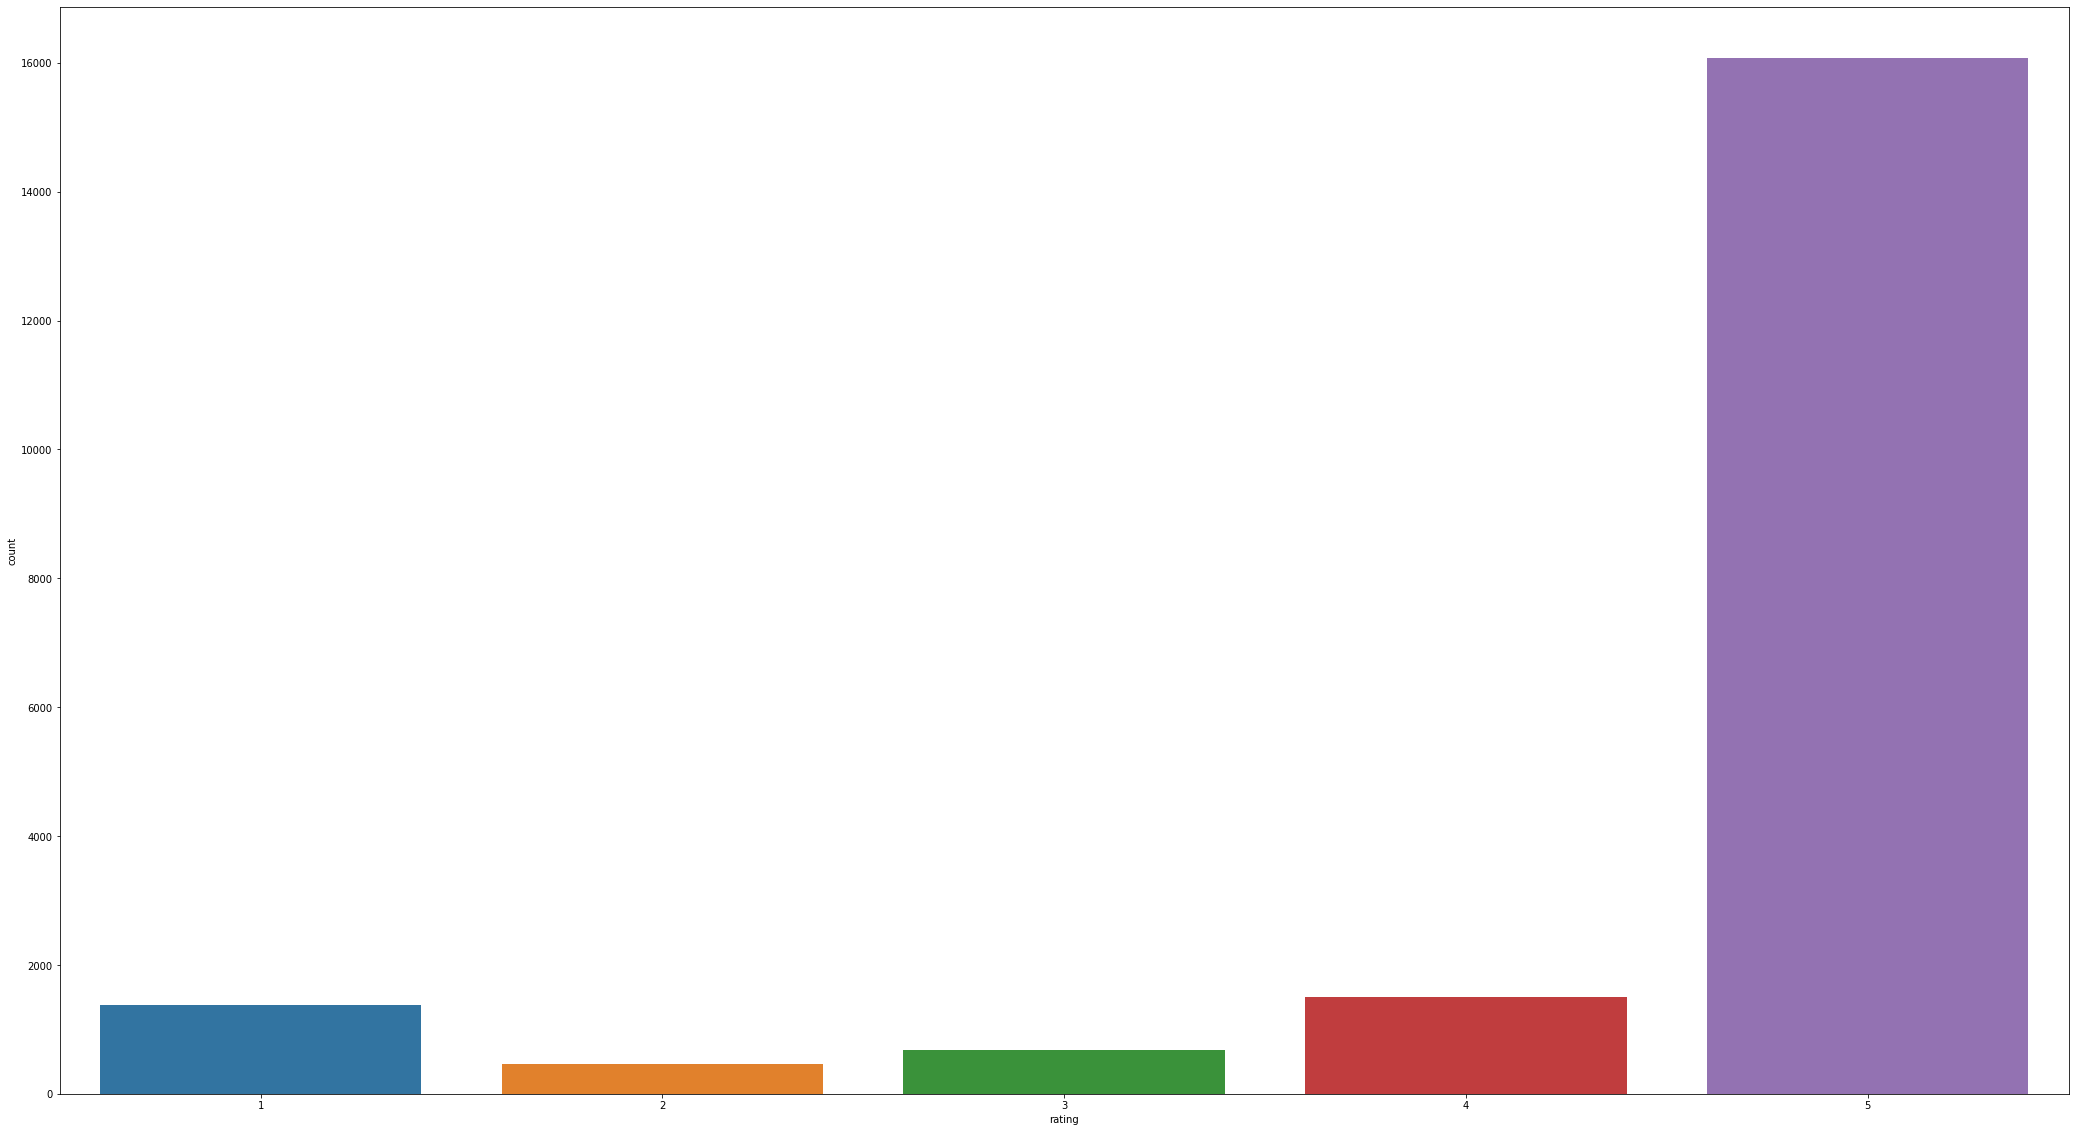

In [20]:
plt.figure(figsize=(36,20))
sns.countplot(x='rating',data= df_google)
plt.show()

## **2. Apple Store**

apple store app name => too-good-to-go-end-food-waste AND its id => 1060683933

In [21]:
# Retrieving app reviews from apple store
apple_r = AppStore(country="gb", app_name="too-good-to-go-end-food-waste",app_id=1060683933)
apple_r.review(how_many=10000)

2021-12-29 18:07:38,483 [INFO] Base - Initialised: AppStore('gb', 'too-good-to-go-end-food-waste', 1060683933)
2021-12-29 18:07:38,484 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/too-good-to-go-end-food-waste/id1060683933
2021-12-29 18:07:43,519 [INFO] Base - [id:1060683933] Fetched 440 reviews (440 fetched in total)
2021-12-29 18:07:48,803 [INFO] Base - [id:1060683933] Fetched 920 reviews (920 fetched in total)
2021-12-29 18:07:54,210 [INFO] Base - [id:1060683933] Fetched 1380 reviews (1380 fetched in total)
2021-12-29 18:07:59,494 [INFO] Base - [id:1060683933] Fetched 1860 reviews (1860 fetched in total)
2021-12-29 18:08:20,011 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/gb/apps/1060683933/reviews?l=en-GB&offset=2000&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
2021-12-29 18:

In [22]:
# Converting format (JSON to Pandas Dataframe)
apple = pd.DataFrame(np.array(apple_r.reviews),columns=['review'])
df_apple = apple.join(pd.DataFrame(apple.pop('review').tolist()))
df_apple.head()

,review,userName,title,date,rating,isEdited,developerResponse
0,I have had this app for a while but it’s took ...,Jay shake,Not that great to go more like,2021-02-27 15:09:54,5,False,NaN
1,This was the first time using the app. I was a...,Ck1TWO,Barley Farm - Eccles,2020-09-28 21:50:36,5,False,NaN
2,"I like this idea, sometimes we get some great ...",mobilebob2,Mixed review,2021-11-04 16:43:02,5,False,NaN
3,Just got the app really so I don’t have much t...,AnActualPoolPlayer,"Good idea in theory, but flawed",2019-09-07 11:44:36,1,False,"{'id': 10585622, 'body': 'Hi there, We're sor..."
4,Used the app for the first time today and was ...,Ceilidh279,Outstanding!,2019-09-07 17:21:51,5,False,NaN


In [23]:
# Storing raw data in pickle format
df_apple.to_pickle('AppleStoreReview_TooGoodToGo.pkl')

# Importing doc back to standardize it into workable format
df_apple = "data/AppleStoreReview_TooGoodToGo.pkl" #path to be written

with open(df_apple, 'rb') as f:
    df_apple = pickle.load(f)

df_apple.head(5)

In [24]:
df_apple.shape

(2000, 7)

In [25]:
# to concatenate Title & review content
df_apple['review_content'] = df_apple['title'] + ' ' + df_apple['review']

In [26]:
# Dropping unnecessary columns
df_apple = df_apple.drop(columns=['review','userName', 'isEdited','title','developerResponse'])

In [28]:
# Reordering columns
df_apple = df_apple[['review_content', 'rating', 'date']]

In [30]:
# Adding "source" column to put "Apple"
df_apple['source'] = 'Apple'

In [31]:
# Checking dataframe
df_apple.head(5)

,review_content,rating,date,source
0,Not that great to go more like I have had this...,5,2021-02-27 15:09:54,Apple
1,Barley Farm - Eccles This was the first time u...,5,2020-09-28 21:50:36,Apple
2,"Mixed review I like this idea, sometimes we ge...",5,2021-11-04 16:43:02,Apple
3,"Good idea in theory, but flawed Just got the a...",1,2019-09-07 11:44:36,Apple
4,Outstanding! Used the app for the first time t...,5,2019-09-07 17:21:51,Apple


In [32]:
# Check new format
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  2000 non-null   object        
 1   rating          2000 non-null   int64         
 2   date            2000 non-null   datetime64[ns]
 3   source          2000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 62.6+ KB


In [33]:
# Checking ISNA
df_apple.isna().sum()

review_content    0
rating            0
date              0
source            0
dtype: int64

In [34]:
# Checking duplicates 
df_apple.duplicated().sum()

0

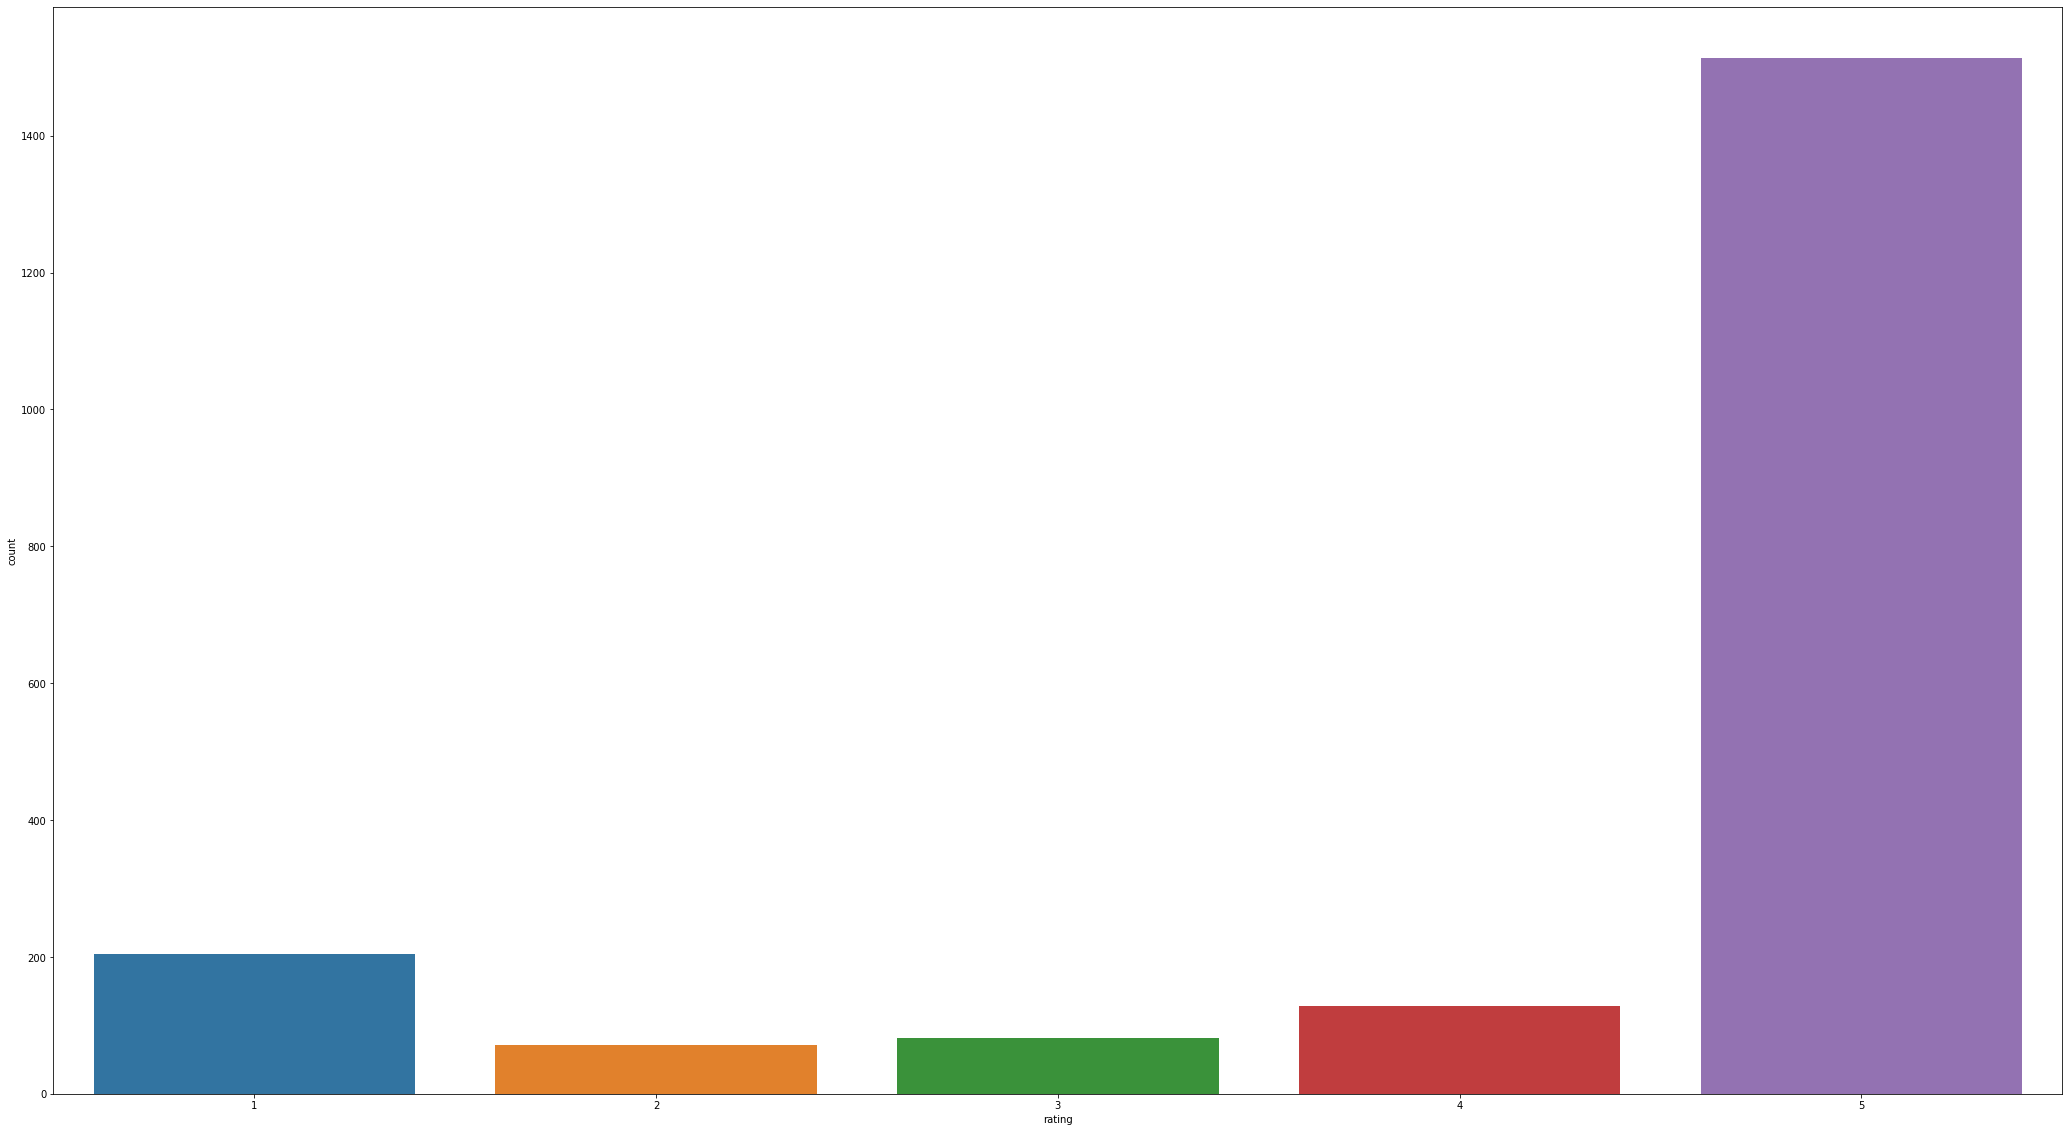

In [35]:
plt.figure(figsize=(36,20))
sns.countplot(x='rating',data= df_apple)
plt.show()

## **3. Trustpilot**

In [36]:
# Retrieving app reviews from trustpilot website
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:93.0) Gecko/20100101 Firefox/93.0'
}
response = requests.get('https://uk.trustpilot.com/review/toogoodtogo.com?page=2', headers=headers)
response.status_code

200

In [37]:
soup = BeautifulSoup(response.content)
data = json.loads(soup.find('script', type='application/json').string)
reviews_t = data["props"]["pageProps"]["reviews"]

sample_reply = reviews_t[0]
sample_reply

{'id': '61b11d8c2b49257fe29a4648',
 'filtered': False,
 'text': 'Made an order with Co op Erdington, it was really bad, the value was way below what i paid, im an adult and they gave me baby ready meals, the fresh carrots had gone off, what i thought was a good has changed my mind, i had to throw most of it away, so defeated the object',
 'rating': 1,
 'labels': {'merged': None,
  'verification': {'isVerified': False,
   'createdDateTime': '2021-12-08T21:03:08.000Z',
   'reviewSourceName': 'Organic',
   'verificationSource': 'invitation',
   'verificationLevel': 'not-verified'}},
 'title': 'Made an order with Co op Erdington',
 'likes': 0,
 'dates': {'experiencedDate': None,
  'publishedDate': '2021-12-08T21:03:08.000Z',
  'updatedDate': None},
 'report': None,
 'hasUnhandledReports': False,
 'consumer': {'id': '5ea0ad5650943e2497a97d5d',
  'displayName': 'Harjote Soor',
  'imageUrl': '',
  'numberOfReviews': 3,
  'countryCode': 'GB',
  'hasReviewFacebookFriend': False,
  'isDirectFace

In [38]:
#collecting all the info of the review we might need to process after checking it
reviewsText = []
reviewsTitle = []
ratings = []
publishedDate = []


for i in range(1,75):
    url = "https://uk.trustpilot.com/review/toogoodtogo.com?page={}".format(i)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content)
    data = json.loads(soup.find('script', type='application/json').string)
    reviews_t = data["props"]["pageProps"]["reviews"]
    for review in reviews_t:
        reviewsTitle.append(review['title'])
        reviewsText.append(review['text'])
        ratings.append(review['rating'])
        publishedDate.append(review['dates']['publishedDate'])

In [39]:
# Converting reviews in pandas dataframe
df_trust = pd.DataFrame(np.column_stack([ratings, publishedDate, reviewsTitle, reviewsText]), 
                               columns=['rating', 'date', 'title', 'content'])

In [40]:
df_trust.head()

,rating,date,title,content
0,5,2021-12-29T17:20:29.000Z,Never been let down yet!,Never been let down yet!\nBlackpool....\nFavou...
1,1,2021-12-29T17:04:40.000Z,Surprise but no bag!,I ordered a surprise bag from a restaurant. P...
2,1,2021-12-28T21:14:18.000Z,The shelf date on all of the item…,The shelf date on all of the item package was ...
3,1,2021-12-28T19:25:29.000Z,Ordered a too good to go this is my…,Ordered a too good to go this is my second tim...
4,1,2021-12-28T16:09:24.000Z,Disappointing app,This app is very promising but this is the 3rd...


In [41]:
# Storing raw data in pickle format
df_trust.to_pickle('TrustpilotReview_TooGoodToGo.pkl')

# Importing doc back to standardize it into workable format
df_trust = "data/TrustpilotReview_TooGoodToGo.pkl" 

with open(df_trust, 'rb') as f:
    df_trust = pickle.load(f)

df_trust.head()

In [42]:
df_trust.shape

(1480, 4)

In [43]:
# to concatenate Title & review content
df_trust['review_content'] = df_trust['title'] + ' ' + df_trust['content']

In [47]:
# Dropping unnecessary columns
df_trust = df_trust.drop(columns=['title','content'])

KeyError: "['title' 'content'] not found in axis"

In [52]:
# Checking dataframe
df_trust.head()

,rating,date,review_content
0,5,2021-12-29 17:20:29+00:00,Never been let down yet! Never been let down y...
1,1,2021-12-29 17:04:40+00:00,Surprise but no bag! I ordered a surprise bag ...
2,1,2021-12-28 21:14:18+00:00,The shelf date on all of the item… The shelf d...
3,1,2021-12-28 19:25:29+00:00,Ordered a too good to go this is my… Ordered a...
4,1,2021-12-28 16:09:24+00:00,Disappointing app This app is very promising b...


In [49]:
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rating          1480 non-null   object
 1   date            1480 non-null   object
 2   review_content  1480 non-null   object
dtypes: object(3)
memory usage: 34.8+ KB


In [38]:
# Formatting date => removing anything on the right of T (T being included)
df_trust['date'] = df_trust['date'].str[:10]

In [50]:
# Formatting date
df_trust['date'] = pd.to_datetime(df_trust['date'], format='%Y-%m-%d')

In [40]:
# Reordering columns
df_trust = df_trust[['review_content', 'rating', 'date']]

In [53]:
# Adding "source" column to put "Trustpilot"
df_trust['source'] = 'Trustpilot'

In [55]:
# Formatting rating
df_trust['rating'] = df_trust['rating'].astype(int)

In [56]:
# Check new format
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   rating          1480 non-null   int64              
 1   date            1480 non-null   datetime64[ns, UTC]
 2   review_content  1480 non-null   object             
 3   source          1480 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 46.4+ KB


In [57]:
# Checking ISNA
df_trust.isna().sum()

rating            0
date              0
review_content    0
source            0
dtype: int64

In [58]:
# Checking duplicates 
df_trust.duplicated().sum()

0

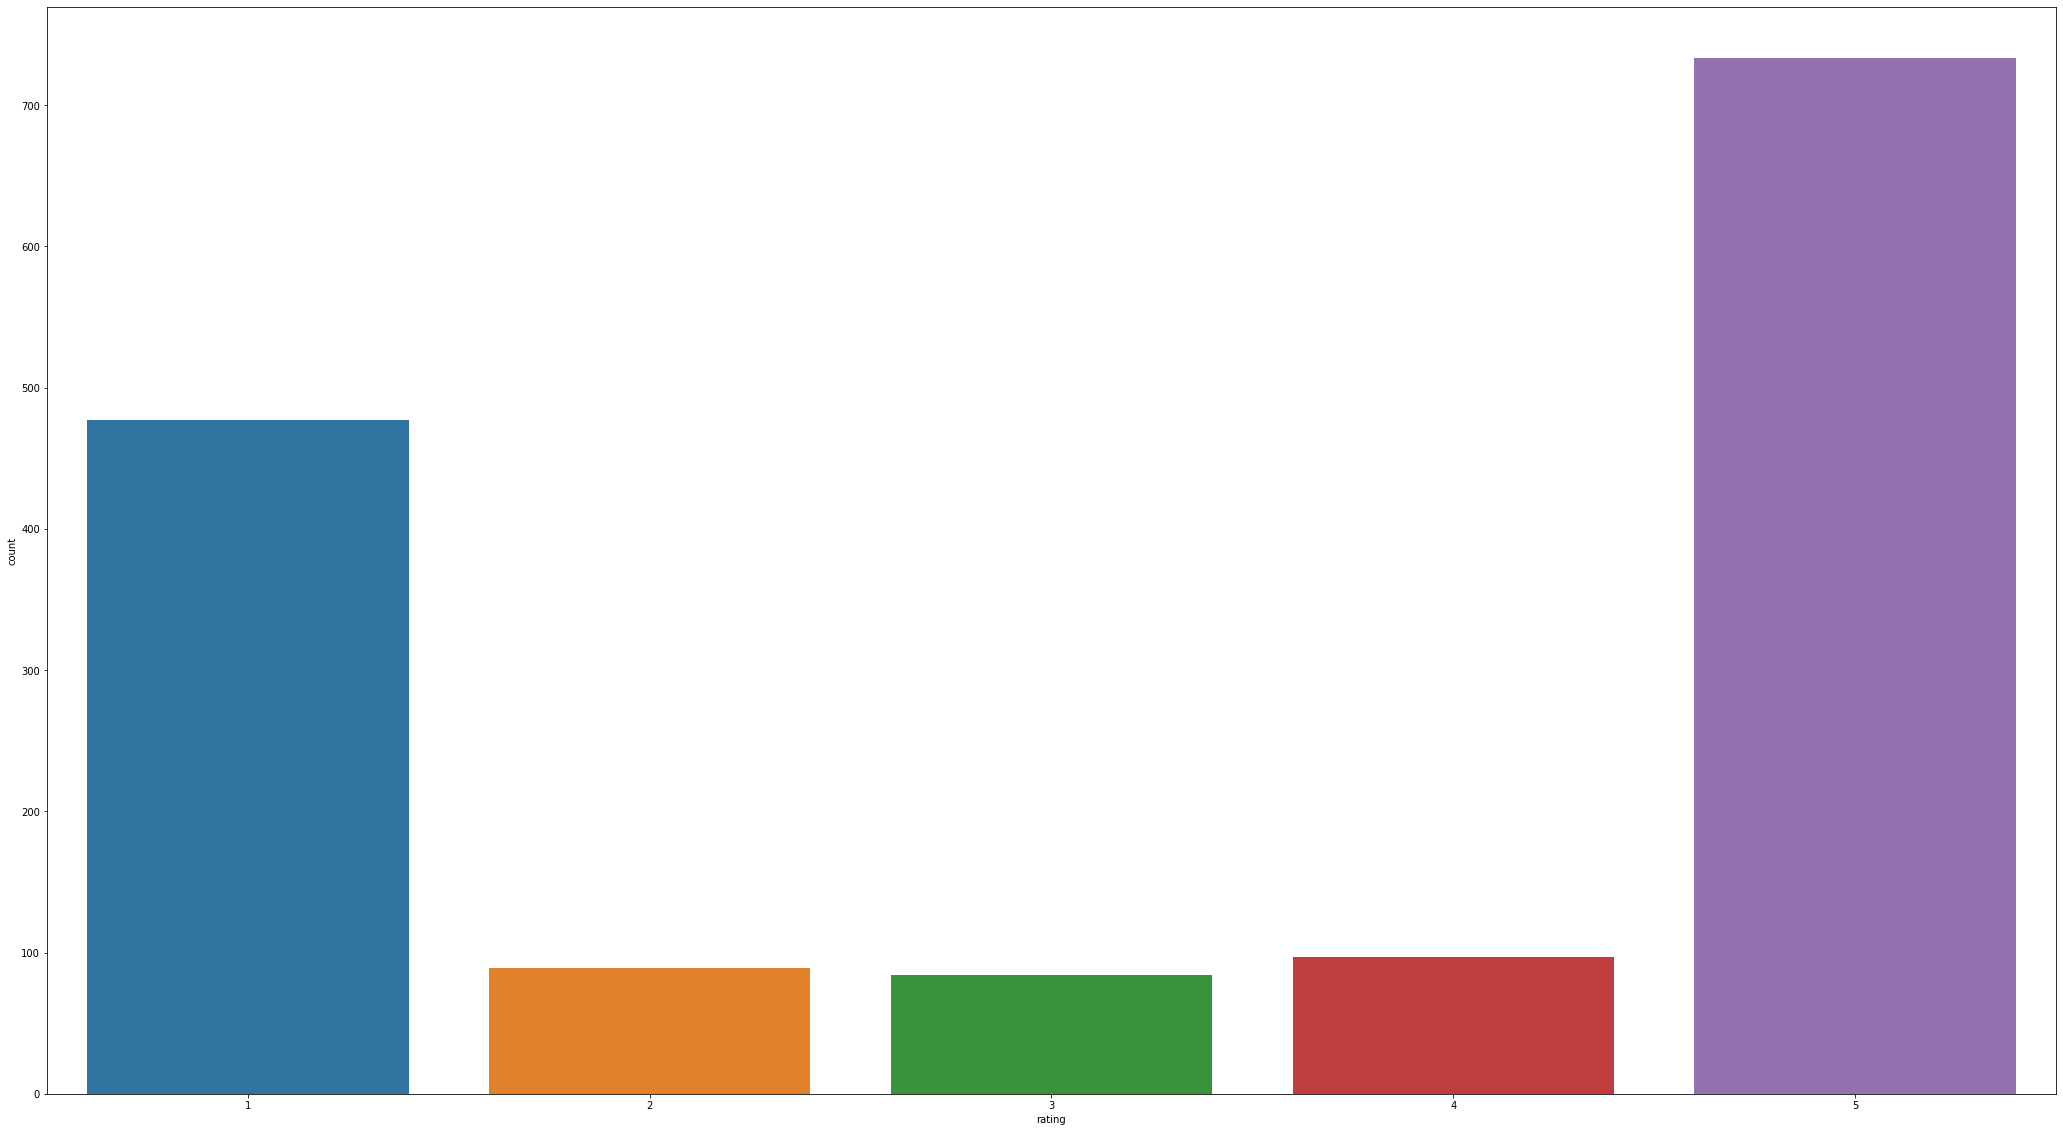

In [59]:
plt.figure(figsize=(36,20))
sns.countplot(x='rating',data= df_trust)
plt.show()

## **4. Concatenation**

In [165]:
df = pd.concat([df_google, df_apple, df_trust], axis=0)
df.head()

,review_content,rating,date,source
0,Great value for money. Food was still fresh an...,5,2021-12-29 17:10:58,Google
1,occasionally a surprise bag is offered after t...,4,2021-12-29 16:29:27,Google
2,Well-designed app except they really need to a...,5,2021-12-29 15:19:48,Google
3,Thanks for the reply! It makes sense to not no...,1,2021-12-29 14:31:29,Google
4,A good buy will definitely use again,5,2021-12-29 11:13:52,Google


In [166]:
df.shape

(23572, 4)

In [167]:
# formatting date
df['date2'] = pd.to_datetime(df['date'], utc=True)

In [168]:
# formatting date => to remove day
df['date3'] = df['date2'].dt.tz_localize(None)

In [169]:
df['date4'] = df['date3'].dt.normalize()

In [136]:
# checking format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23572 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  23572 non-null  object        
 1   rating          23572 non-null  int64         
 2   source          23572 non-null  object        
 3   date            23572 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


In [170]:
df = df[['review_content','rating','source','date4']]
df.columns=['review_content','rating','source','date']
df.head()

,review_content,rating,source,date
0,Great value for money. Food was still fresh an...,5,Google,2021-12-29
1,occasionally a surprise bag is offered after t...,4,Google,2021-12-29
2,Well-designed app except they really need to a...,5,Google,2021-12-29
3,Thanks for the reply! It makes sense to not no...,1,Google,2021-12-29
4,A good buy will definitely use again,5,Google,2021-12-29


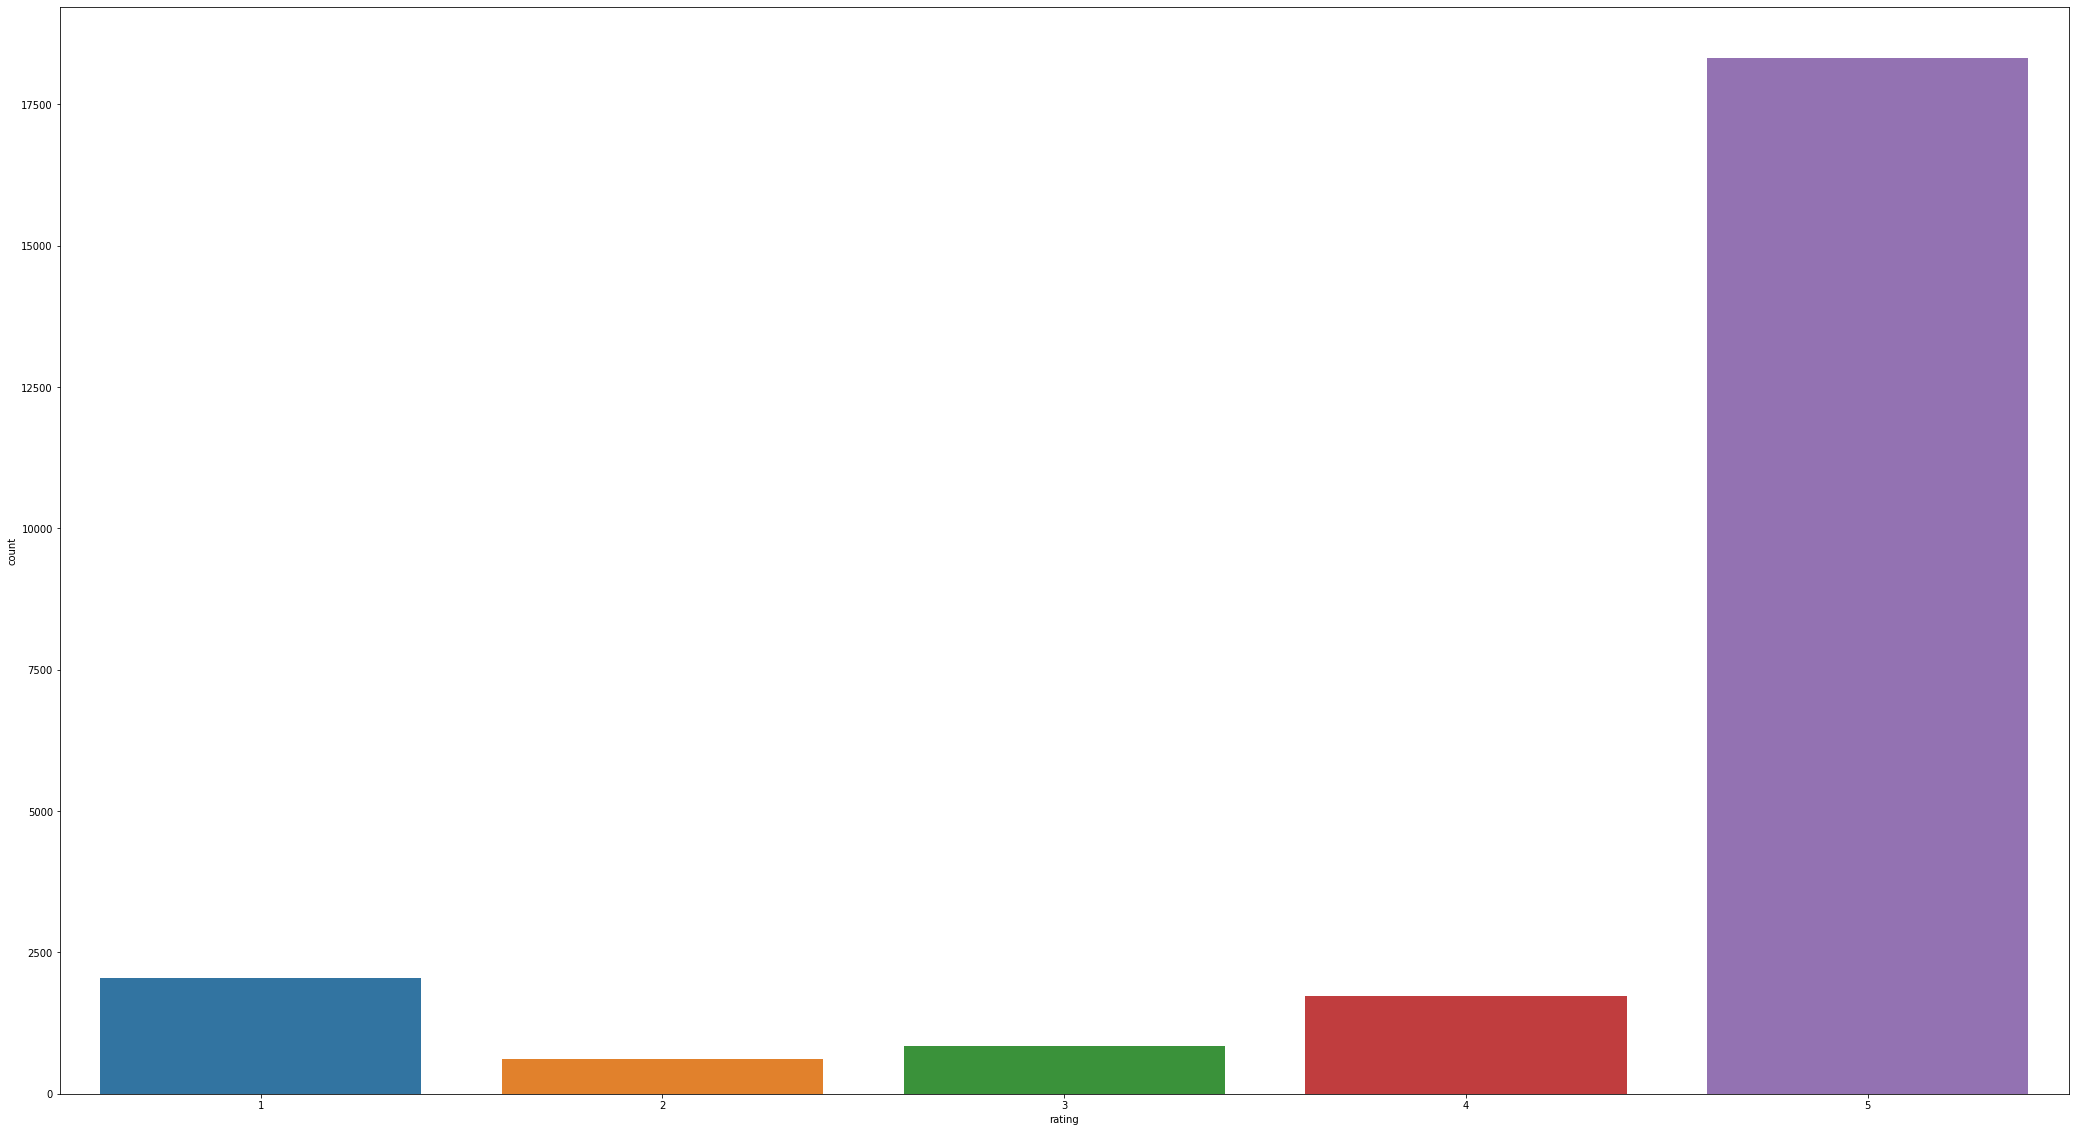

In [150]:
plt.figure(figsize=(36,20))
sns.countplot(x='rating',data= df)
plt.show()

In [104]:
# Storing data in pickle format
df.to_pickle('reviews_tgtg_v0.pkl')

In [1]:
df.reset_index(inplace=True)

NameError: name 'df' is not defined

In [172]:
df=df[['review_content','rating','source','date']]

### Adjusting class imbalance for rating
This project entailed the use of classification models, and for reliable results, I had to remove reviews to undo class imbalance. Using this visualisation I saw that were much less reviews with a score of 1 compared to reviews with a score of 5. To combat this imbalance, I randomly removed reviews with scores of 5, to match with 1 (2056 reviews).

In [182]:
minority_class_len = len(df[df['rating'] == 3])
minority_class_len

1057

In [183]:
score_1_class_indices = df[df['rating'] == 1].index
score_2_class_indices = df[df['rating'] == 2].index
score_3_class_indices = df[df['rating'] == 3].index
score_4_class_indices = df[df['rating'] == 4].index
score_5_class_indices = df[df['rating'] == 5].index

In [184]:
random_score_1_class_indices = np.random.choice(score_1_class_indices,minority_class_len,replace=False)
print(len(random_score_1_class_indices))
random_score_4_class_indices = np.random.choice(score_4_class_indices,minority_class_len,replace=False)
print(len(random_score_4_class_indices))
random_score_5_class_indices = np.random.choice(score_5_class_indices,minority_class_len,replace=False)
print(len(random_score_5_class_indices))

1057
1057
1057


In [185]:
under_sample_indices = np.concatenate([random_score_1_class_indices,score_2_class_indices,score_3_class_indices,random_score_4_class_indices,random_score_5_class_indices])

In [186]:
df = df.loc[under_sample_indices]

In [187]:
df['rating'].value_counts()

5    5444
1    4209
4    2655
3    2332
2    1926
Name: rating, dtype: int64

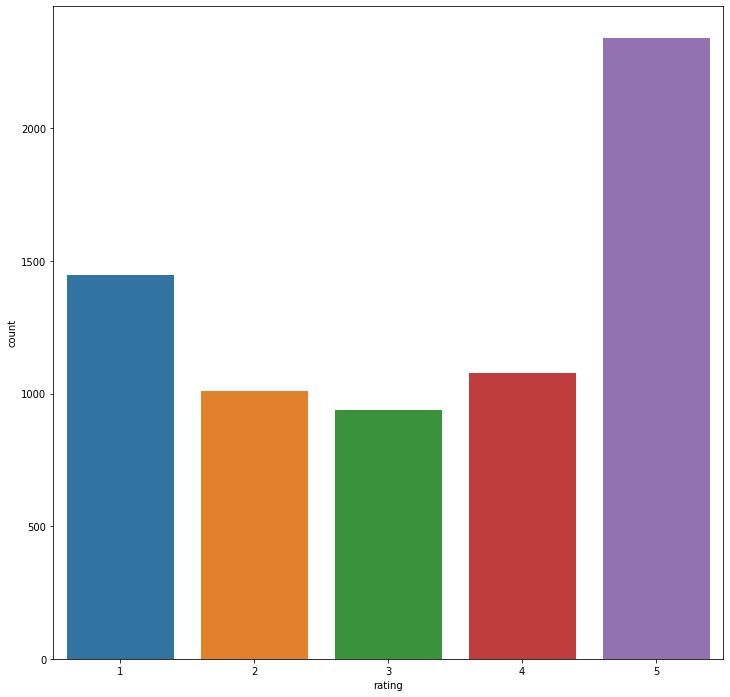

In [160]:
plt.figure(figsize=(12,12))
sns.countplot(x='rating',data=df)
plt.show()

In [162]:
df.to_pickle('reviews_tgtg_v1.pkl')

## Step 2: Twitter dataset

In [105]:
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#TooGoodToGo since:2019-01-01 until:2021-12-28 lang:en').get_items()):
    if i>5000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

2021-12-29 21:44:50,084 [INFO] snscrape.modules.twitter - Retrieving scroll page None
2021-12-29 21:44:50,084 [INFO] snscrape.modules.twitter - Retrieving guest token
2021-12-29 21:44:50,085 [INFO] snscrape.base - Retrieving https://twitter.com/search?f=live&lang=en&q=%23TooGoodToGo+since%3A2019-01-01+until%3A2021-12-28+lang%3Aen&src=spelling_expansion_revert_click
2021-12-29 21:44:50,435 [INFO] snscrape.base - Retrieved https://twitter.com/search?f=live&lang=en&q=%23TooGoodToGo+since%3A2019-01-01+until%3A2021-12-28+lang%3Aen&src=spelling_expansion_revert_click: 200
2021-12-29 21:44:50,442 [INFO] snscrape.base - Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=ext

In [107]:
tweets_df['date2'] = pd.to_datetime(tweets_df['Datetime'], utc=True)
tweets_df['date3'] = tweets_df['date2'].dt.tz_localize(None)
tweets_df['date'] = tweets_df['date3'].dt.normalize()
tweets_df.head()

,Datetime,Tweet Id,Text,Username,date2,date3,date
0,2021-12-27 20:51:44+00:00,1475570112417644551,First time trying @toogoodtogo.be ! we are pr...,RebeccaNiu,2021-12-27 20:51:44+00:00,2021-12-27 20:51:44,2021-12-27
1,2021-12-27 18:09:58+00:00,1475529403832672259,I got very excited at the reduced and #TooGood...,CaitlinHafferty,2021-12-27 18:09:58+00:00,2021-12-27 18:09:58,2021-12-27
2,2021-12-27 12:06:00+00:00,1475437807405518849,Make sure you when you cook leftovers they are...,GIS_volunteers,2021-12-27 12:06:00+00:00,2021-12-27 12:06:00,2021-12-27
3,2021-12-27 10:46:42+00:00,1475417851334959104,Today's entry is something that I've cooked to...,ApronBrothers,2021-12-27 10:46:42+00:00,2021-12-27 10:46:42,2021-12-27
4,2021-12-26 23:53:56+00:00,1475253576062672902,#TooGoodToGo 2nd Order at Tartinery.. Yeah! 😃 ...,chocosesameball,2021-12-26 23:53:56+00:00,2021-12-26 23:53:56,2021-12-26
...,...,...,...,...,...,...,...
2722,2019-01-16 17:38:36+00:00,1085592165227614208,First #toogoodtogo save... https://t.co/dbnYVC...,GustaafVocking,2019-01-16 17:38:36+00:00,2019-01-16 17:38:36,2019-01-16
2723,2019-01-12 21:07:22+00:00,1084195154309861377,Wish @TooGoodToGo_UK was used more in #Chelten...,Hanfunkymonkey,2019-01-12 21:07:22+00:00,2019-01-12 21:07:22,2019-01-12
2724,2019-01-11 18:17:04+00:00,1083789909637431296,Super excited to announce that we've partnered...,TheBigButtyBar,2019-01-11 18:17:04+00:00,2019-01-11 18:17:04,2019-01-11
2725,2019-01-09 13:59:08+00:00,1083000222811344897,Thomas in Parken Bakeri has joined the movemen...,OsloSciencePark,2019-01-09 13:59:08+00:00,2019-01-09 13:59:08,2019-01-09


In [108]:
tweets_df = tweets_df[['Text', 'date']]
tweets_df.columns=['review_content','date']

In [109]:
tweets_df['source']='Twitter'

/tmp/ipykernel_7964/443677151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['source']='Twitter'


In [110]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727 entries, 0 to 2726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  2727 non-null   object        
 1   date            2727 non-null   datetime64[ns]
 2   source          2727 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 64.0+ KB


In [112]:
tweets_df.to_pickle('tweets2021tgtg.pkl')